# Logistic Regression

## Typical PyTorch Pipeline

In [1]:
# 1) Design model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
#  - forward pass: compute prediction
#  - backward pass: gradients
#  - update weights

In [2]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets  # binary classification dataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
# 0) prepare data

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
n_samples, n_features = X.shape

# 30 features, one predicted class
print(n_samples)
print(n_features)

569
30


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# for binary classification it's better to scale data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  # see explanation below why not fit_transform

# convert data to tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

# reshape the y tensor (make it a column vector
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

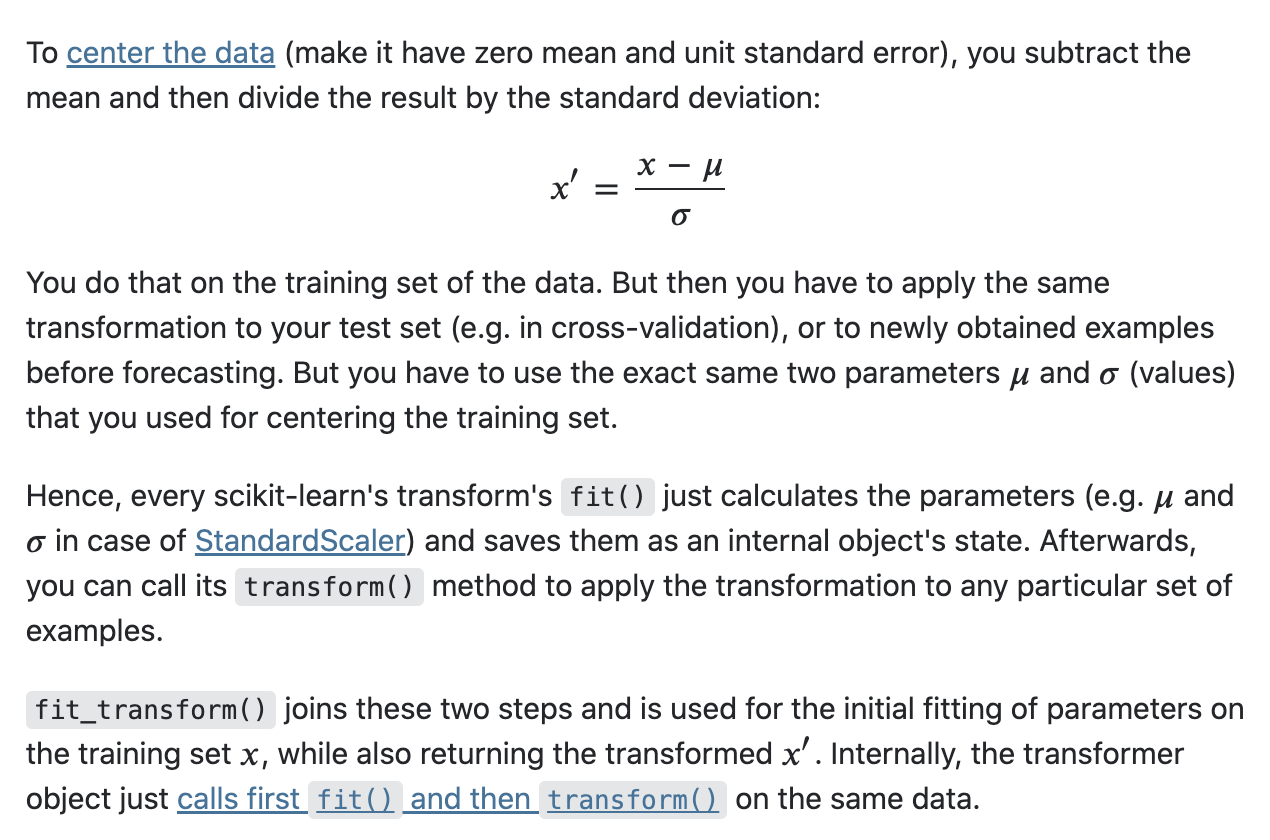

In [5]:
from IPython.display import Image

Image(filename='figures/logistic_regression_01.png', width=500)

In [16]:
# 1) model

# f = wx + b, sigmoid at the end

class LogisticRegression(nn.Module):
    
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
    
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted
    
model = LogisticRegression(n_features)

In [17]:
# 2) loss and optimizer

learning_rate = 0.01
criterion = nn.BCELoss()  # Binary Cross-Entropy
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [23]:
# 3) training loop

num_epochs = 1000
for epoch in range(num_epochs):
    
    # forward pass and loss
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)
    
    # backward pass
    loss.backward()
    
    # update weights
    optimizer.step()
    optimizer.zero_grad()
    
    if epoch % 100 == 0:
        [w,b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {loss.item():.8f}')
        
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    # print(f'predicted class: {y_predicted.round()}')
    print(f'accuracy = {acc:.4f}')


epoch 1: w = -0.280, loss = 0.13735631
epoch 101: w = -0.299, loss = 0.12815768
epoch 201: w = -0.315, loss = 0.12114380
epoch 301: w = -0.329, loss = 0.11557652
epoch 401: w = -0.340, loss = 0.11102334
epoch 501: w = -0.351, loss = 0.10721239
epoch 601: w = -0.360, loss = 0.10396344
epoch 701: w = -0.368, loss = 0.10115169
epoch 801: w = -0.376, loss = 0.09868781
epoch 901: w = -0.383, loss = 0.09650587
accuracy = 0.9912
